The goal of this homwork:
- Identify potential sources of bias in at least two of the three datasets
- Describe how dataset bias could lead to potential unintended negative consequences of using machine learning models trained on these datasets (or the datasets themselves) in scientific research and/or data-driven software applications
- Suggest how these sources of bias could be corrected or otherwise accounted for in order to avoid these unintended consequences
- Demonstrate that you are able to use the literate programming capabilities of Jupyter Notebooks in order to document your analysis (in programming cells, tables, and graphs) and your insights, questions, and explanations (in markdown cells) within the same document.

$\large\text{Step 1: Select the dataset and perform analysis}$<br>
$\underline {Motivation}$ $\underline{for}$ $\underline{the}$ $\underline{analysis:}$<br>
- $\text {Aggression datasets}$ <br>
$\text {Q1- a) Is there gender inequality (e.g. more men than women) in the number of crowdworkers and how is it different from the general population?}$ $\text {b) Which gender annotates comments as more aggressive in the aggression datasets?}$ 
- $\text {Toxicity datasets}$ <br>
$\text {Is there gender inequality (e.g. more men than women) in the number of crowdworkers who annotatedd the Wikipedia Talk corpus for Toxicity and how is it different from the general population?}$ $\text {b) Which gender annotated comments as more toxic in the toxicity datasets?}$ 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

$\underline {Data Sources}$
- $\text {Aggression datasets}$ <br>
Demographic and annotated atasets were downloaded from https://figshare.com/articles/dataset/Wikipedia_Talk_Labels_Aggression/4267550

- $\text {Toxicity datasets}$ <br>
Demographic and annotated atasets were downloaded from 
https://figshare.com/articles/dataset/Wikipedia_Talk_Labels_Toxicity/4563973


In the following cell, I am reading the data

In [3]:
agression_worker_demog = pd.read_csv('/Users/sdibay/Downloads/aggression_worker_demographics.tsv', sep='\t')
aggression_annotation = pd.read_csv('/Users/sdibay/Downloads/aggression_annotations.tsv', sep='\t')


toxicity_worker_demog = pd.read_csv('/Users/sdibay/Downloads/toxicity_worker_demographics.tsv', sep='\t')
toxicity_annotation = pd.read_csv('/Users/sdibay/Downloads/toxicity_annotations.tsv', sep='\t')

$\textbf{The following analysis responds the part "a" of the Q1:}$
$\text {a) Is there gender inequality (e.g. more men than women) in the number of crowdworkers and how is it different from the general population?}$
- $ \text {As we can see that the number men of the crowdworker annotators are more than women (1349 vs. 840).}$ 
In other words only about 38% are women

In [4]:
agression_worker_demog['gender'].value_counts()

male      1349
female     840
other        1
Name: gender, dtype: int64

$\textbf {The following analysis responds the part "b" of the Q1:}$ <br>
$\text {b) Which gender  annotates comments as more aggressive in the aggression datasets?}$ <br>
- As the first step I will identify the common column between the demographic and annotation datasets to merge them. The follwoign code shows that worker_id is common between the datasets which is unique. Thus I will merge two datasets based on worker id. 

In [5]:
agression_worker_demog.head(1)

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors


In [6]:
aggression_annotation.head(1)

,rev_id,worker_id,aggression,aggression_score
0,37675,1362,1.0,-1.0


- $\text {Second step would be joining aggression and demographics based on the key column (worker_id)}$ <br>
I did a left join on with the aggression dataset on the left side since I wanted to keep all the rows in this dataset

In [7]:
#left join two datasets
df = pd.merge(left=aggression_annotation, right=agression_worker_demog, how='left', left_on='worker_id', right_on='worker_id')
#making a dataframe
df = pd.DataFrame (df)
df.head()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,male,0.0,18-30,masters
1,37675,2408,0.0,1.0,male,1.0,30-45,hs
2,37675,1493,0.0,0.0,female,0.0,30-45,bachelors
3,37675,1439,0.0,0.0,male,0.0,18-30,hs
4,37675,170,0.0,0.0,NaN,NaN,NaN,NaN


Then cross tabulating agression rating against gender to break the rating based on the gender. 

In [8]:
c= pd.crosstab(index= df['gender'],columns=df['aggression']).rename(columns={0.0: "rated non-aggressive", 1.0: "rated aggressive"})
c

aggression,rated non-aggressive,rated aggressive
gender,,
female,247501,60602
male,451201,96127
other,46,37


In [9]:
# Initialize the datalist based on the crosstabulation reults in the previous cell
data = {'Gender':['Female', 'Male'], 'rated non-aggressive':[247501,451201], 'rated aggressive':[60602,96127]} 
# create DataFrame
ct = pd.DataFrame(data) 
ct

,Gender,rated non-aggressive,rated aggressive
0,Female,247501,60602
1,Male,451201,96127


$\textbf { Grouped Bar Graph of Agrression Annotation by Crowdworker Gender}$ <br>
The following piece of code helps me to draw a grouped bar graph that compares howmany drowdworker annotated comments as aggressive and non-aggressive by gender. My thought was that more women than men will annotate some comments as aggressive as women in the society are more victom of aggression and perhaps are more aware of the aggressive words and contexts. Based on the graph we can see that women are more prone to annotate the words as aggressive. Women about 20%  and men about 18% tend to annotate a comment as aggressive. This is while in part "a" we saw that women only make 38% of the crowd workers which shows inequality in crowdworker gender distribution may affect the models.  

/Users/sdibay/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


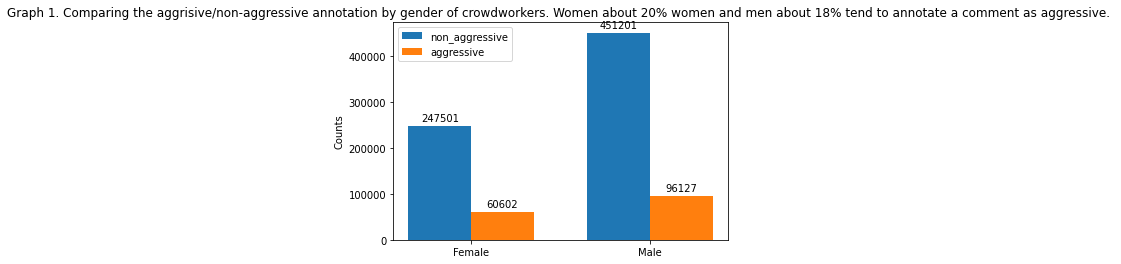

In [10]:
labels = ['Female', 'Male']
rated_nonaggresive = [247501, 451201]
rated_aggressive = [60602, 96127]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rated_nonaggresive, width, label='')
rects2 = ax.bar(x + width/2, rated_aggressive, width, label='')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Graph 1. Comparing the aggrisive/non-aggressive annotation by gender of crowdworkers. Women about 20% women and men about 18% tend to annotate a comment as aggressive. ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(['non_aggressive', 'aggressive'])


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

$\textbf{The following analysis responds the part "a" of the Q2:}$
$\text {a) Is there gender inequality (e.g. more men than women) in the number of crowdworkers and how is it different from the general population in the toxisity dataset?}$
- $ \text {As we can see number of the men of the crowdworker annotators are more than women (2327 vs. 1263).}$ 
In other words only about 35% are women.

In [10]:
toxicity_worker_demog['gender'].value_counts()

male      2327
female    1263
other        1
Name: gender, dtype: int64

$\textbf {The following analysis responds the part "b" of the Q2:}$ <br>
$\text {b) Which gender  annotates comments as more toxic in the Toxicity datasets?}$ <br>
- As the first step I will identify the common column between the demographic and annotation datasets to merge them. The follwoign code shows that worker_id is common between the datasets which is unique for each crowdworker. Thus I will merge two datasets based on worker id. 

In [11]:
toxicity_worker_demog.head(1)

,worker_id,gender,english_first_language,age_group,education
0,85,female,0,18-30,bachelors


In [12]:
toxicity_annotation.head(1)

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0


In [13]:
#left join two datasets
df = pd.merge(left=toxicity_annotation, right=toxicity_worker_demog, how='left', left_on='worker_id', right_on='worker_id')
#making a dataframe
df = pd.DataFrame (df)
df.head()

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
0,2232.0,723,0,0.0,female,0.0,30-45,bachelors
1,2232.0,4000,0,0.0,male,1.0,18-30,hs
2,2232.0,3989,0,1.0,female,0.0,18-30,bachelors
3,2232.0,3341,0,0.0,NaN,NaN,NaN,NaN
4,2232.0,1574,0,1.0,female,0.0,30-45,bachelors


In [14]:
t= pd.crosstab(index= df['gender'],columns=df['toxicity']).rename(columns={0.0: "rated non-toxic", 1.0: "toxic"})
t

toxicity,rated non-toxic,toxic
gender,,
female,385500,71846
male,764857,124394
other,299,59


$\textbf { Grouped Bar Graph of Toxicity Annotation by Crowdworker Gender}$ <br>
The following piece of code helps me to draw a grouped bar graph that compares howmany crowdworker annotated comments as toxic and non-toxic by gender. My thought was that more women than men will annotate some comments as toxic than men. Based on the graph we can see that women are more prone to annotate the words as toxic. Women about 16% and men about 14% tend to annotate a comment as aggressive. 

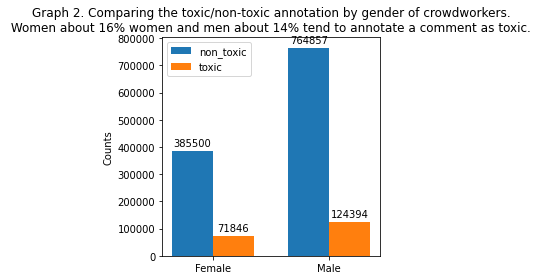

In [12]:
labels = ['Female', 'Male']
rated_nontoxic = [385500, 764857]
rated_toxic = [71846, 124394]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rated_nontoxic, width, label='')
rects2 = ax.bar(x + width/2, rated_toxic, width, label='')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Graph 2. Comparing the toxic/non-toxic annotation by gender of crowdworkers.\n Women about 16% women and men about 14% tend to annotate a comment as toxic. ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(['non_toxic', 'toxic'])


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

$\large\text {Step 2: Discuss further implications}\$

- Answer at least 3 of the following questions (use complete sentences.

$\text {2- Which, if any, of these demo applications would you expect the Perspective API to perform poorly in? Why?}$ <br>
I investigated two datasets (aggression and toxicity) and in both of them I see that there is a gender bias in crowdworker who annotated the comments. An application like "Hot Topic" could act poorly and isolate topics that are relevant and important for women because the algorithm is trained based on a data in which women are significantly under-represented compared to the real world distribution of men and women. Other applications such as "Comment Filter" and "Wiki Detox" also could act poorly for the very same reason.


$\text {5- What are some potential unintended, negative consequences of using the Perspective API for any of these purposes? In your opinion, are these consequences likely or serious enough that you would recommend that the Perspective API not be used in these applications? Why or why not?}$<br>

One main potential consequence would be that topics that are important and relevant to women will be disregarded (e.g. "Hot Topic") or applications such as "Comment Filter" that are meant to reduce toxicity cannot perform as well for women. The main reason is the disparity that exists in the gender distribution of the crowdworkers. I investigated gender distribution for Toxicity and Aggression and in both of them crowdworkers are mainly men. How men define toxicity and agression is very different from women, which affects how these algorithms could perform differently across genders. This may also adversely affect mental health equality. 

$\text {6- Imagine you are one of the Google data scientists who maintains the Perspective API. If you wanted to improve the model or the API itself to make it work better for any of these purposes, how should they go about doing that?}$<br>

Using other sources to train the data would be one way. They can gather samples that are better representative of the general population to annotate different texts, and then use these annotations to train the ML models instead. 
One important demographic information that is missing is ethnicity. People from different ethnic groups may have different experiences and define toxicity and aggression completely differently.

$\large \text {Summary and Motivation}$ <br>
<br>
To investigate the gender inequality in crowdworker that annotated  Wikipedia Talk corpus of thousands online discussion posts in two Aggression and Toxicity datasets (i.e. skewed labeller gender distribution). Furthur looked into how each gender inclinded to lablel the comments as "aggressive" or "toxic" (exploring the difference in labeling behavior). I wanted to look and see how the difference in gender distribution and difference in labeling behavior could affect the models that are based on these annotations.<br>
<br>
$\large \text {Questions investigated}$ <br>
<br>
- $\text {Aggression datasets}$ <br>
$\text {Q1- a) Is there gender inequality (e.g. more men than women) in the number of crowdworkers and how is it different from the general population?}$ $\text {b) Which gender annotates comments as more aggressive in the aggression datasets?}$ 
- $\text {Toxicity datasets}$ <br>
$\text {Is there gender inequality (e.g. more men than women) in the number of crowdworkers who annotatedd the Wikipedia Talk corpus for Toxicity and how is it different from the general population?}$ $\text {b) Which gender annotated comments as more toxic in the toxicity datasets?}$<br>
<br>
$\large \text {Presentation of results}$ <br>
<br>
$\text {Gender distribution:}$<br>
<br>
- The distribution of men and women in both datasets (Aggression and Toxicity) are biased. In both datasets number of men outweight the number of women. In the aggression dataset I found that th number of the men of the crowdworker annotators are more than women (1349 vs. 840).In other words only about 38% are women. In other words only about 38% are women. In the "Toxicity" dataset, the number of the men of the crowdworker annotators are more than women (2327 vs. 1263).In other words only about 35% are women.<br>
<br>
$\text {Labeling behavior by gender:}$<br>
<br>
- Exploratory analysis shows that there is a difference on how women label comments compared to women. Based on the Graph.1 we can see that women are more prone to annotate the words as aggressive. Women about 20% women and men about 18% tend to annotate a comment as aggressive. Based on Graph.2 we can see that women about 16% and men about 14% tend to annotate a comment as aggressive. <br>
<br>
$\text {Comparing the results in two datasets:}$<br>
<br>
- Gender distribution difference exists in both datasets (more men than women represnts crowdworker). 
- Labeling behavior for aggression and toxicity seems different comparing men and women. 

$\large \text{Implications}$ <br>
<br>
Gender distribution difference exists in both datasets (more men than women represnts crowdworker). This is problematic because the crowdworker distribution does not follow the underlying gender distribution in the population.
Labeling behavior for aggression and toxicity seems different comparing men and women. This furthur shows how building model based on data that are annotated mostly by men could be problematic.